In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/avanti/anaconda3/lib/python3

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

523a1a82c23711ea9f9157d4c043164e.bin
523a1a82c23711ea9f9157d4c043164e_graph.bin
523a1a82c23711ea9f9157d4c043164e_graph.weights
523a1a82c23711ea9f9157d4c043164e.tree
BpNet-Viz.ipynb
commit0975f52_l6g2m0_results.hdf5
commit20e04f_corrthresh0_nomemeinit_4layerembedding_results.hdf5
commit20e04f_corrthresh0p1_nomemeinit_4layerembedding_results.hdf5
commit20e04f_nomemeinit_4layerembedding_results.hdf5
commit891181_memeinit_l6g2m0_results.hdf5
commit891181_nomemeinit_l6g2m0_results.hdf5
commitb86c5a_l6g2m0_results.hdf5
copy_data.py
copy_model.sh
dcfeda32c23611ea9f9157d4c043164e.bin
deeplift.imp_score.h5
embedding_model.h5
extracted_contrib_scores.npy
extracted_hypothetical_scores.npy
extracted_onehot.npy
LocalNormSeqletIdentification.ipynb
MakeEmbeddingModelAndRunTfModisco_corrthresh-0.1.ipynb
MakeEmbeddingModelAndRunTfModisco.ipynb
meme_out
model.h5
myrun_results.hdf5
presparserun_l8g3m2_results.hdf5
presparserun_results.hdf5
ReplaceSeqletsWithAggregates-Copy1.ipynb
ReplaceSeqletsWithAggreg

In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

pattern idx 0
4011


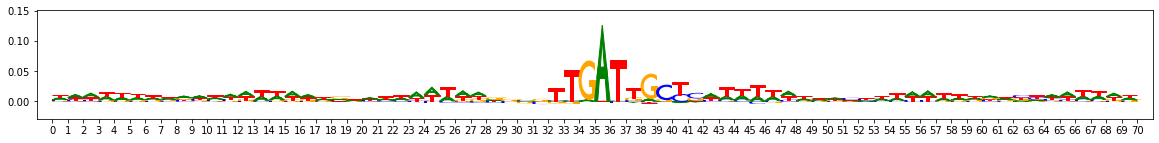

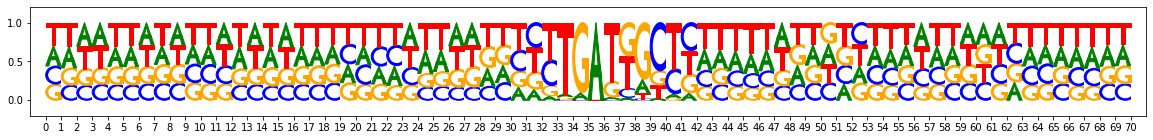

pattern idx 1
2215


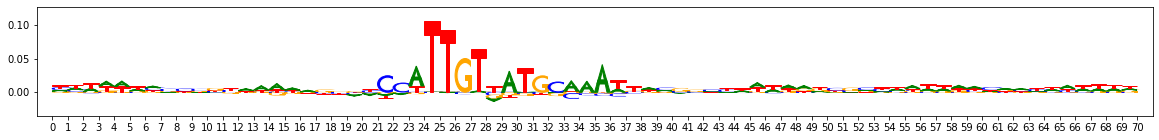

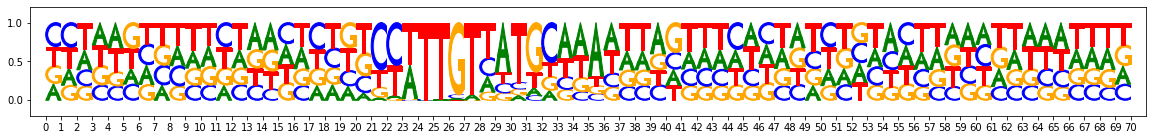

pattern idx 2
1854


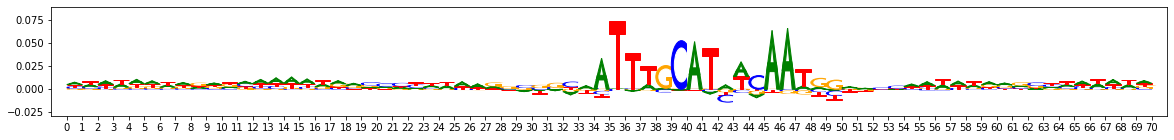

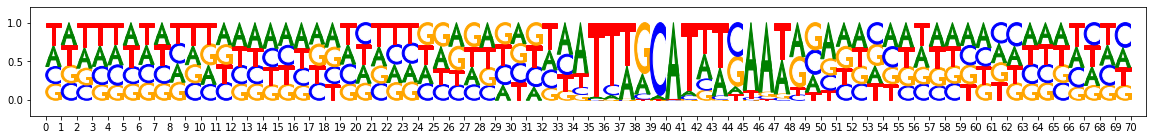

pattern idx 3
1636


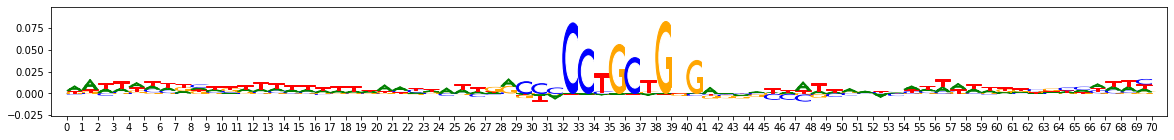

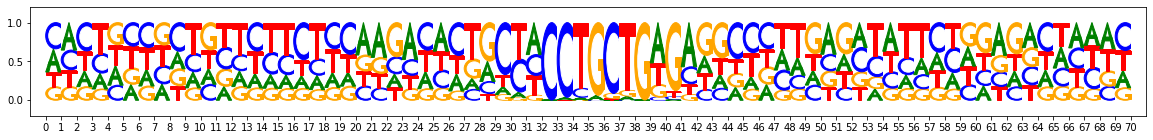

pattern idx 4
937


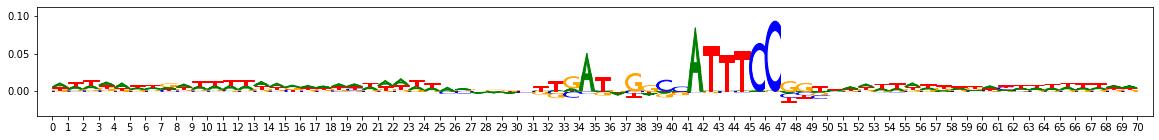

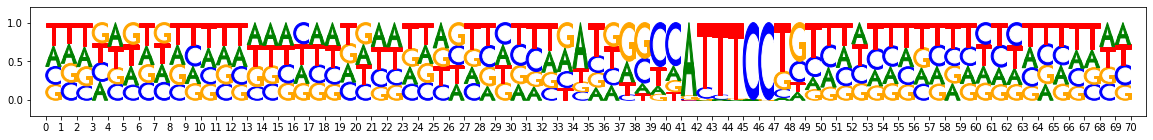

pattern idx 5
749


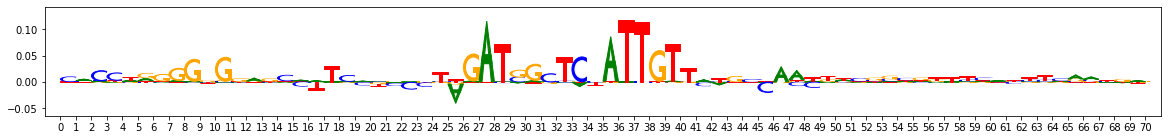

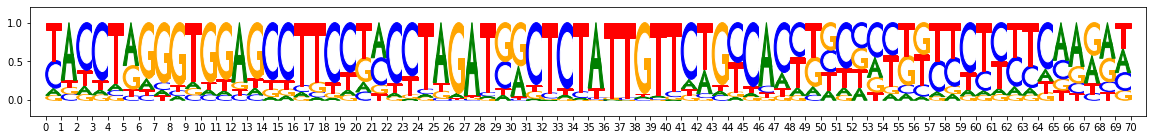

pattern idx 6
466


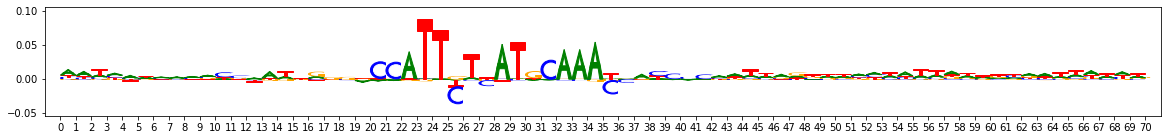

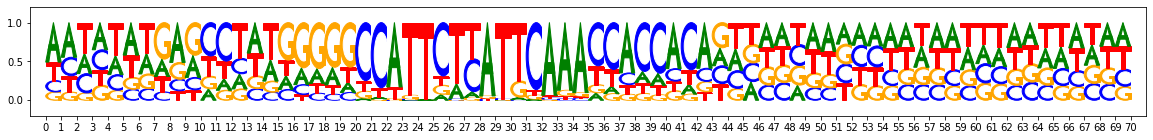

pattern idx 7
231


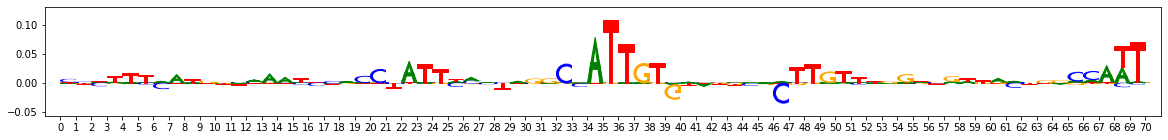

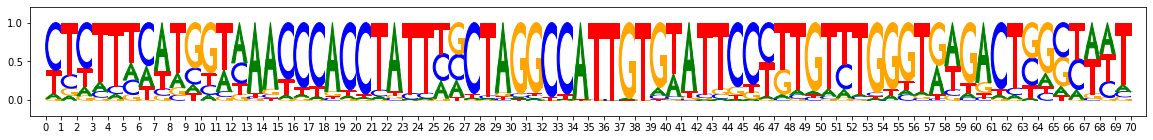

pattern idx 8
191


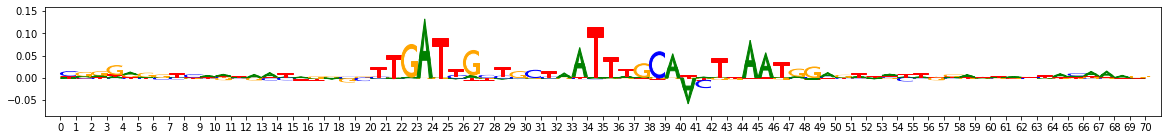

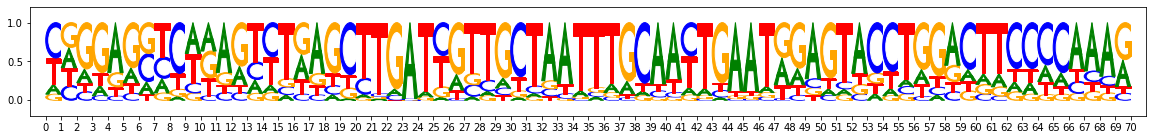

pattern idx 9
187


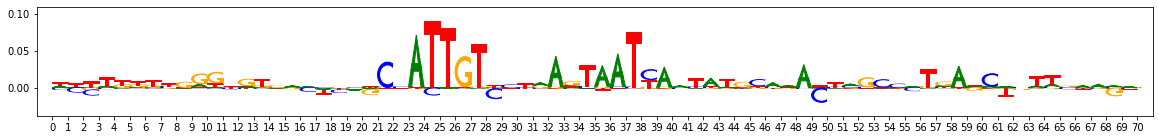

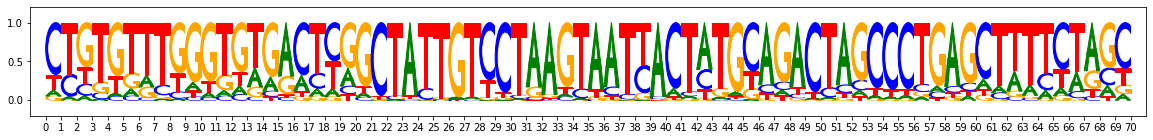

pattern idx 10
142


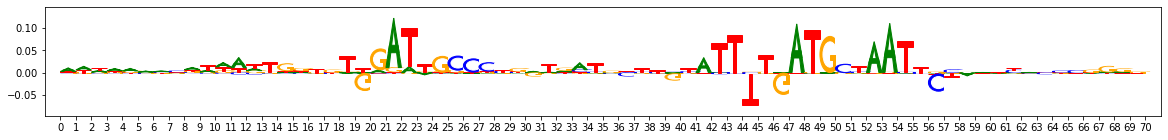

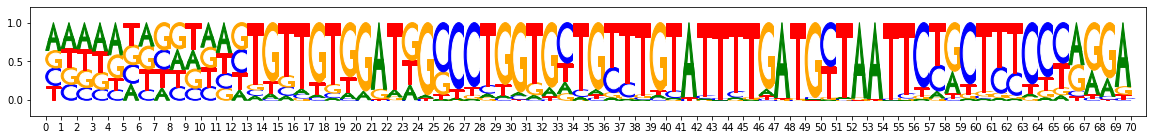

pattern idx 11
117


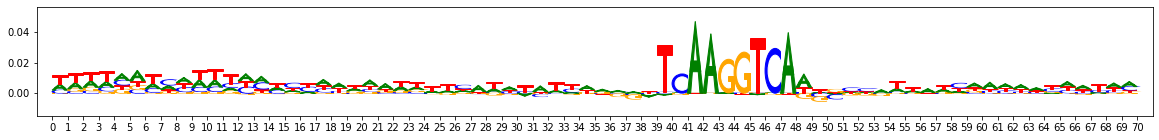

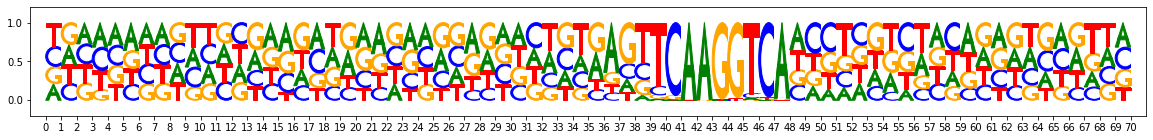

pattern idx 12
89


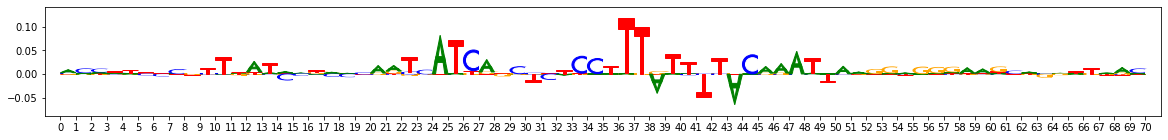

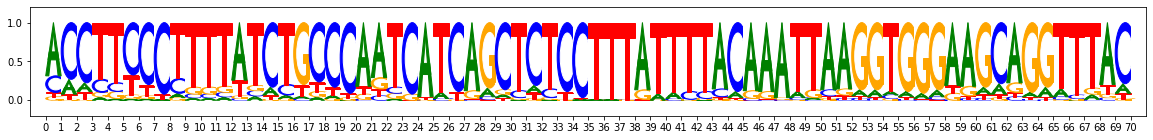

pattern idx 13
105


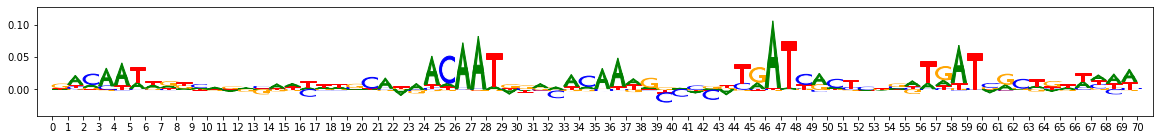

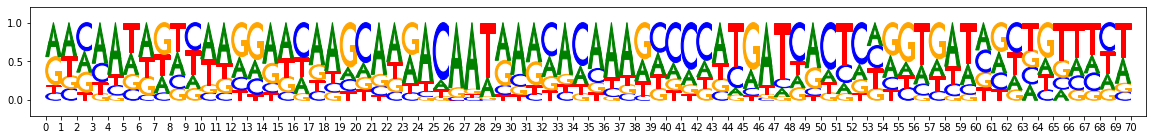

pattern idx 14
105


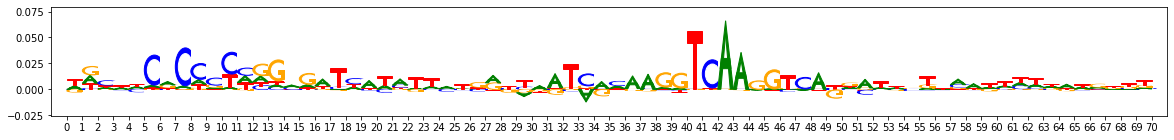

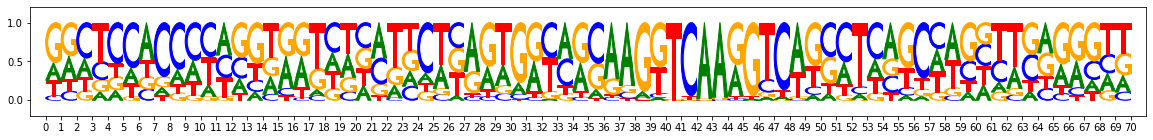

pattern idx 15
65


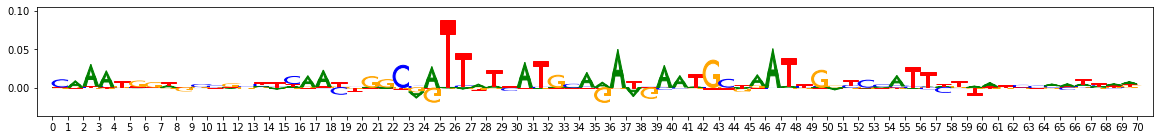

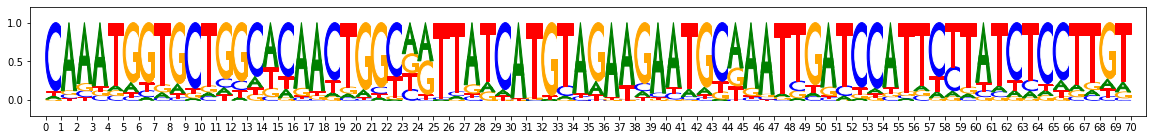

In [8]:
#visualize the saved patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

/mnt/lab_data2/avanti/tfmodisco
commit 57ea704ebc2e8709314365c80b9bb6dd6c4edb10 (HEAD -> advanced_gapped_gkmers, origin/advanced_gapped_gkmers)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Aug 5 22:25:09 2020 -0700

    implementation is there
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 4.486029312
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


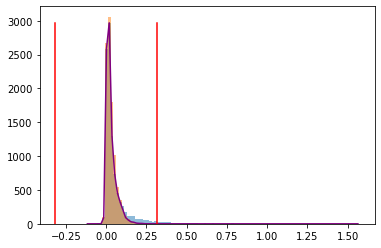

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698999852203116
MEMORY 6.272868352
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 6.274428928
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)


W0806 01:08:34.699883 139752739288896 deprecation_wrapper.py:119] From /mnt/lab_data2/avanti/tfmodisco/modisco/backend/tensorflow_backend.py:87: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.276009984
Beginning embedding computation
Computing embeddings


Using TensorFlow backend.
W0806 01:08:40.434338 139752739288896 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0806 01:08:40.435613 139752739288896 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:184: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0806 01:08:40.436658 139752739288896 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0806 01:08:42.297612 139752739288896 deprecation_wrapper.py:119] From /users/avanti/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use 

Finished embedding computation in 93.98 s
Starting affinity matrix computations
Normalization computed in 3.61 s
Cosine similarity mat computed in 248.13 s
Normalization computed in 8.79 s
Cosine similarity mat computed in 259.28 s
Finished affinity matrix computations in 557.94 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 17.260888064
Computed nearest neighbors in 189.67 s
MEMORY 18.077564928
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 18.077564928
Launching nearest neighbors affmat calculation job
MEMORY 18.1823488
Parallel runs completed
MEMORY 18.638782464
Job completed in: 349.95 s
MEMORY 38.384861184
Launching nearest neighbors affmat calculation job
MEMORY 38.379913216
Parallel runs completed
MEMORY 38.493954048
Job completed in: 344.39 s
MEMORY 58.240212992
(Round 1) Computed affinity matrix on nearest neighbors in 735.03 s
MEMORY 38.638444544
Filtered down to 21445 of 50000
(Round 1) Retained 21445 rows out of 50000 after filtering
MEMORY

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.8244361542348414


  2%|▏         | 1/50 [00:13<10:58, 13.44s/it]

Quality: 0.8251603217814647


  4%|▍         | 2/50 [00:35<12:43, 15.90s/it]

Quality: 0.8268218857932166


 30%|███       | 15/50 [04:16<10:31, 18.06s/it]

Quality: 0.8270255417299403


 58%|█████▊    | 29/50 [08:49<06:28, 18.48s/it]

Quality: 0.8270553069557885


100%|██████████| 50/50 [14:53<00:00, 17.88s/it]

Got 42 clusters after round 1
Counts:
{7: 1292, 6: 1305, 31: 70, 1: 1814, 3: 1717, 22: 133, 12: 617, 9: 777, 4: 1670, 10: 678, 18: 315, 2: 1801, 8: 974, 5: 1656, 13: 595, 23: 128, 36: 38, 0: 2164, 32: 58, 11: 669, 15: 367, 26: 92, 27: 91, 17: 320, 19: 288, 16: 343, 37: 28, 20: 226, 28: 90, 30: 72, 21: 134, 40: 17, 24: 101, 38: 26, 29: 83, 14: 414, 33: 55, 25: 96, 34: 54, 39: 18, 35: 49, 41: 10}
MEMORY 8.639971328
(Round 1) Aggregating seqlets in each cluster
MEMORY 8.639971328
Aggregating for cluster 0 with 2164 seqlets
MEMORY 8.639971328


Trimmed 53 out of 2164
Skipped 1 seqlets
Aggregating for cluster 1 with 1814 seqlets
MEMORY 8.651718656
Trimmed 117 out of 1814
Aggregating for cluster 2 with 1801 seqlets
MEMORY 8.654471168
Trimmed 72 out of 1801
Aggregating for cluster 3 with 1717 seqlets
MEMORY 8.659345408
Trimmed 118 out of 1717
Skipped 1 seqlets
Aggregating for cluster 4 with 1670 seqlets
MEMORY 8.663068672
Trimmed 29 out of 1670
Aggregating for cluster 5 with 1656 seqlets
MEMORY 8.667721728
Trimmed 59 out of 1656
Aggregating for cluster 6 with 1305 seqlets
MEMORY 8.671875072
Trimmed 80 out of 1305
Aggregating for cluster 7 with 1292 seqlets
MEMORY 8.671956992
Trimmed 67 out of 1292
Aggregating for cluster 8 with 974 seqlets
MEMORY 8.676184064
Trimmed 89 out of 974
Aggregating for cluster 9 with 777 seqlets
MEMORY 8.67674112
Trimmed 39 out of 777
Aggregating for cluster 10 with 678 seqlets
MEMORY 8.678055936
Trimmed 70 out of 678
Aggregating for cluster 11 with 669 seqlets
MEMORY 8.678895616
Trimmed 97 out of 669


  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7886609756920974


  2%|▏         | 1/50 [00:25<21:08, 25.89s/it]

Quality: 0.7902088863008182


  4%|▍         | 2/50 [00:39<17:42, 22.14s/it]

Quality: 0.7907276577936063


 14%|█▍        | 7/50 [02:12<13:14, 18.48s/it]

Quality: 0.7907935161391169


100%|██████████| 50/50 [14:19<00:00, 17.18s/it]

Got 36 clusters after round 2
Counts:
{7: 1285, 0: 2177, 6: 1417, 5: 1561, 10: 645, 14: 456, 4: 1591, 2: 1681, 16: 310, 3: 1601, 22: 84, 26: 38, 1: 1696, 11: 539, 12: 530, 21: 121, 8: 1222, 9: 752, 24: 40, 32: 15, 18: 205, 13: 469, 15: 342, 28: 33, 17: 263, 30: 17, 19: 194, 23: 55, 29: 29, 20: 130, 27: 36, 33: 13, 25: 40, 35: 3, 31: 17, 34: 9}
MEMORY 7.556407296
(Round 2) Aggregating seqlets in each cluster
MEMORY 7.556407296
Aggregating for cluster 0 with 2177 seqlets
MEMORY 7.556407296


Trimmed 78 out of 2177
Aggregating for cluster 1 with 1696 seqlets
MEMORY 7.565156352
Trimmed 145 out of 1696
Aggregating for cluster 2 with 1681 seqlets
MEMORY 7.56727808
Trimmed 101 out of 1681
Skipped 1 seqlets
Removed 8 duplicate seqlets
Aggregating for cluster 3 with 1601 seqlets
MEMORY 7.5749376
Trimmed 112 out of 1601
Aggregating for cluster 4 with 1591 seqlets
MEMORY 7.575343104
Trimmed 148 out of 1591
Removed 1 duplicate seqlets
Aggregating for cluster 5 with 1561 seqlets
MEMORY 7.579058176
Trimmed 143 out of 1561
Removed 1 duplicate seqlets
Aggregating for cluster 6 with 1417 seqlets
MEMORY 7.582670848
Trimmed 146 out of 1417
Skipped 1 seqlets
Removed 5 duplicate seqlets
Aggregating for cluster 7 with 1285 seqlets
MEMORY 7.585398784
Trimmed 69 out of 1285
Removed 6 duplicate seqlets
Aggregating for cluster 8 with 1222 seqlets
MEMORY 7.589552128
Trimmed 119 out of 1222
Aggregating for cluster 9 with 752 seqlets
MEMORY 7.590486016
Trimmed 91 out of 752
Removed 3 duplicate seqle

After 1 runs, maximum modularity is Q = 0.020606
Louvain completed 21 runs in 4.304009199142456 seconds
Similarity is 0.822928; is_dissimilar is False
Got 2 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.12364363670349121 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0146596
After 2 runs, maximum modularity is Q = 0.0151289
Louvain completed 22 runs in 4.493885278701782 seconds
Similarity is 0.89264584; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.181380033493042 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0170112
After 3 runs, maximum modularity is Q = 0.0170137
Louvain completed 23 runs in 5.269169092178345 seconds
Similarity is 0.8441603; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.14778661727905273 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is 

In [9]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=6,
        num_gaps=2,
        num_mismatches=0,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [10]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "gappedkmers_l6g2m0_results.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 3867
Task 0 hypothetical scores:


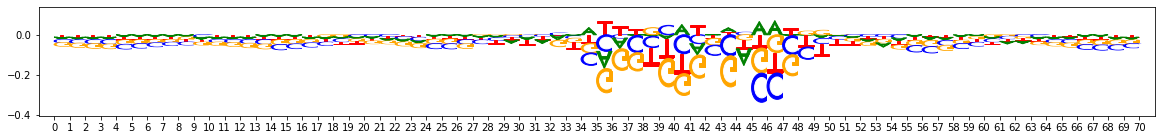

Task 0 actual importance scores:


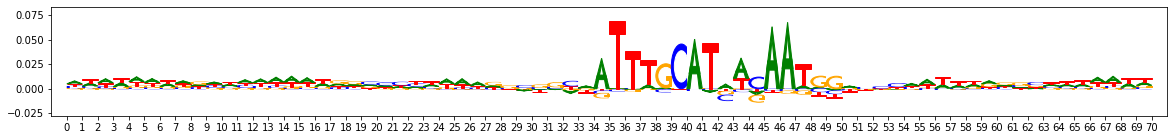

onehot, fwd and rev:


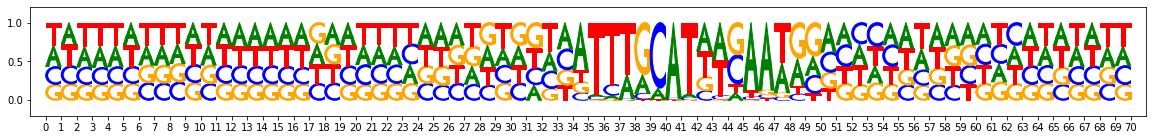

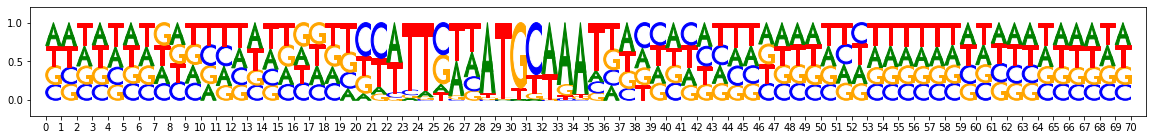

metacluster_0 pattern_1
total seqlets: 3304
Task 0 hypothetical scores:


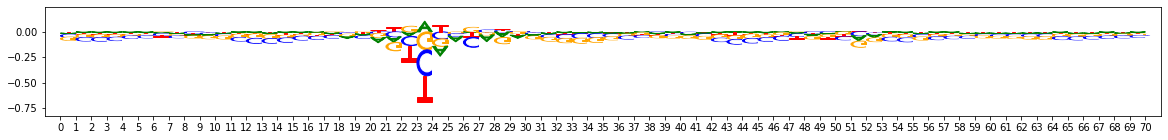

Task 0 actual importance scores:


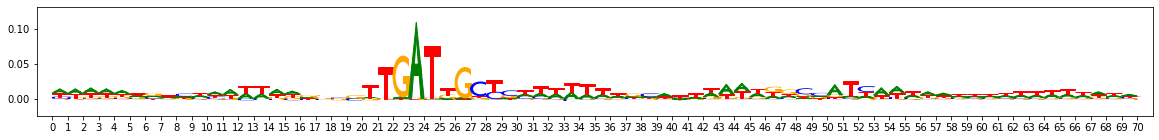

onehot, fwd and rev:


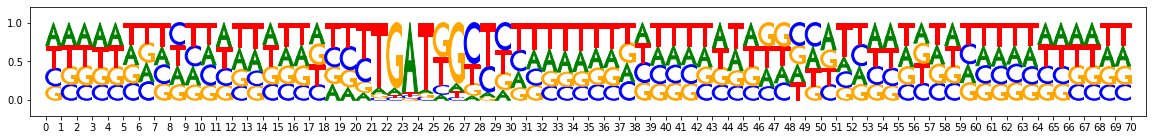

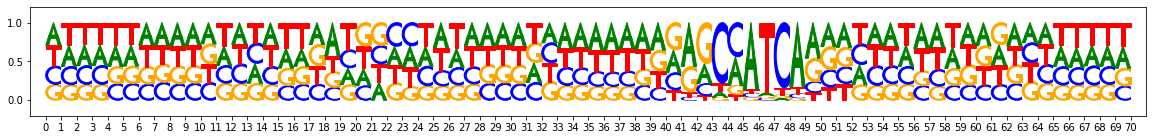

metacluster_0 pattern_2
total seqlets: 3000
Task 0 hypothetical scores:


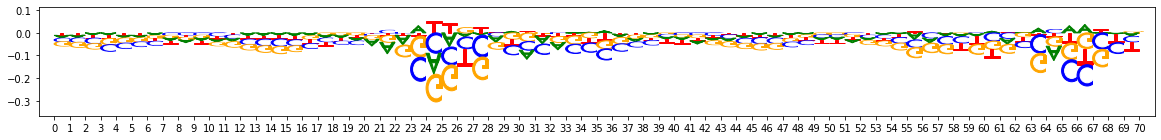

Task 0 actual importance scores:


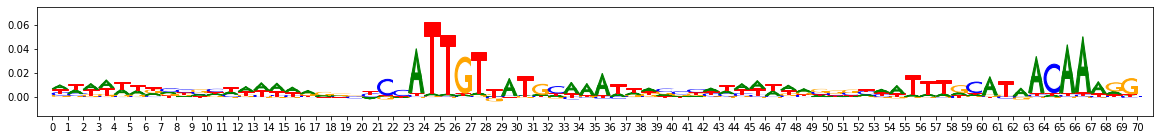

onehot, fwd and rev:


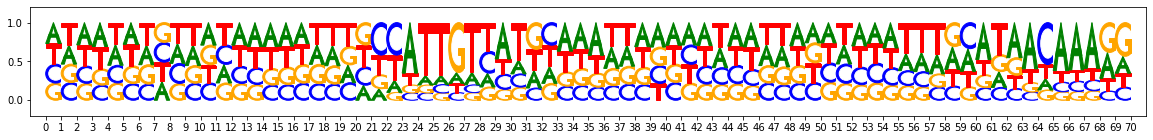

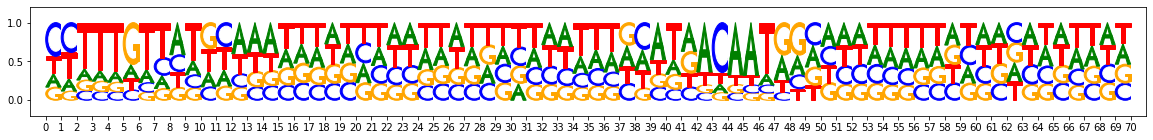

metacluster_0 pattern_3
total seqlets: 1584
Task 0 hypothetical scores:


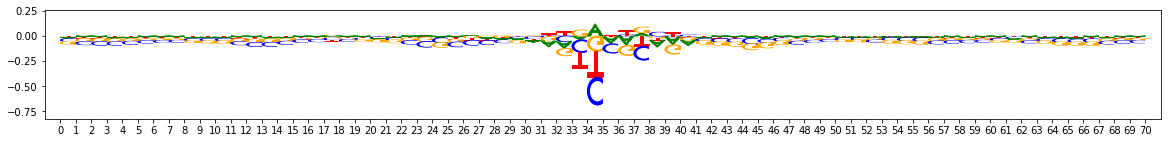

Task 0 actual importance scores:


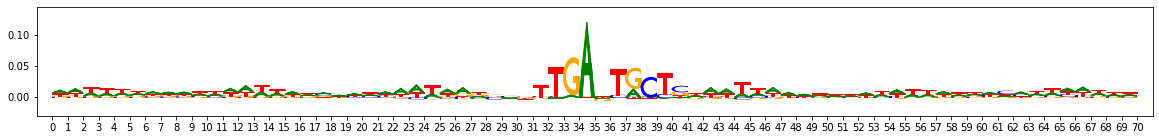

onehot, fwd and rev:


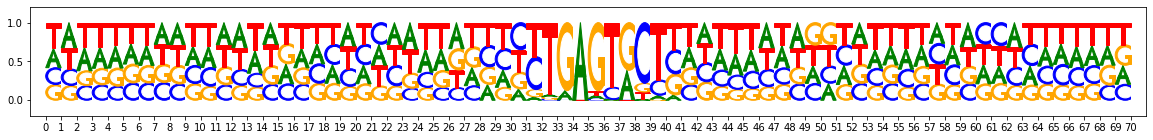

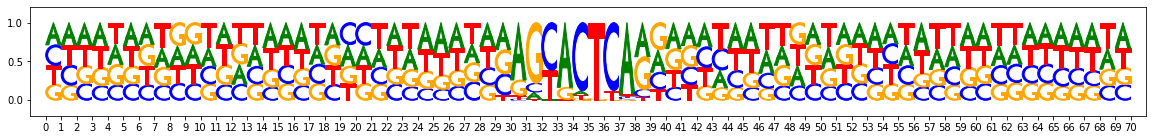

metacluster_0 pattern_4
total seqlets: 1495
Task 0 hypothetical scores:


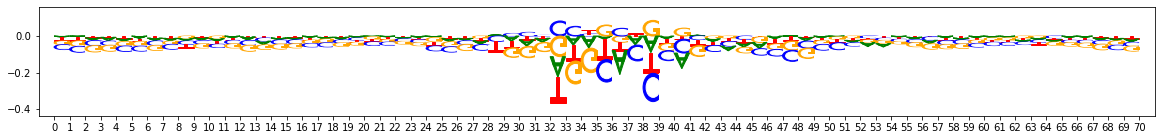

Task 0 actual importance scores:


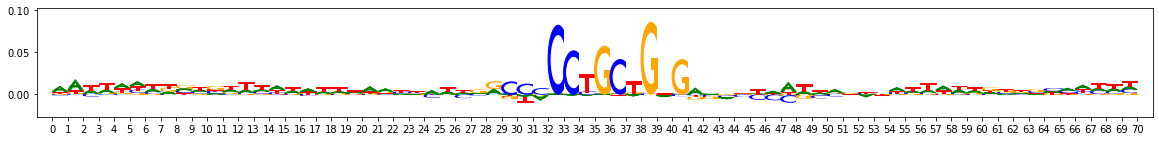

onehot, fwd and rev:


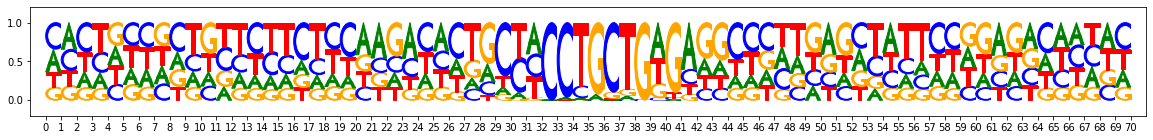

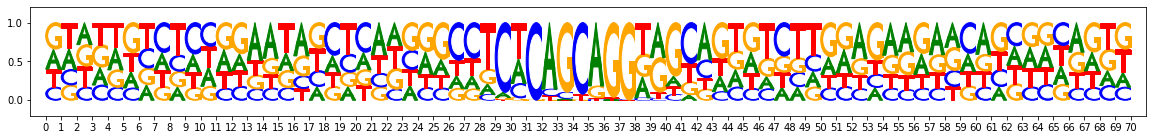

metacluster_0 pattern_5
total seqlets: 1115
Task 0 hypothetical scores:


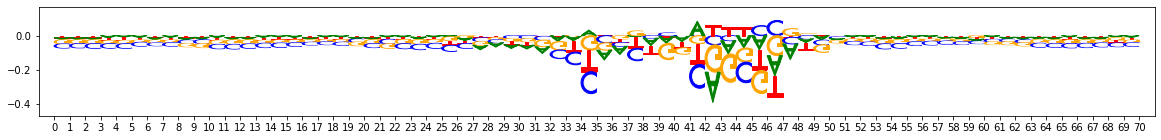

Task 0 actual importance scores:


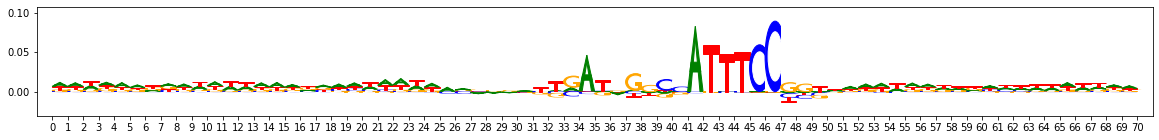

onehot, fwd and rev:


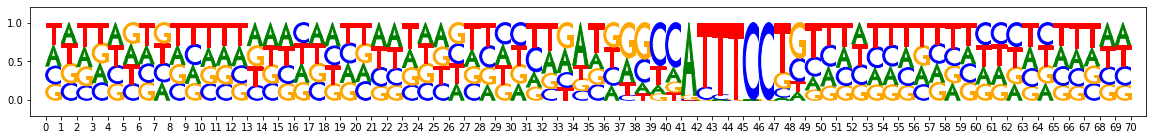

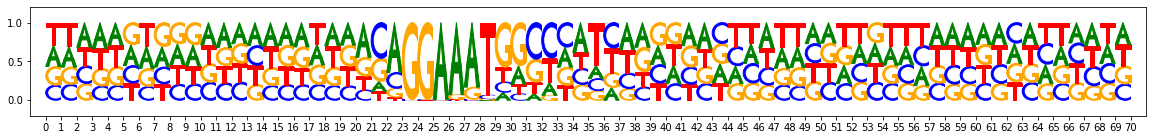

metacluster_0 pattern_6
total seqlets: 617
Task 0 hypothetical scores:


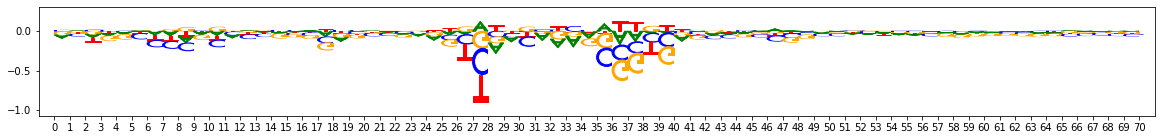

Task 0 actual importance scores:


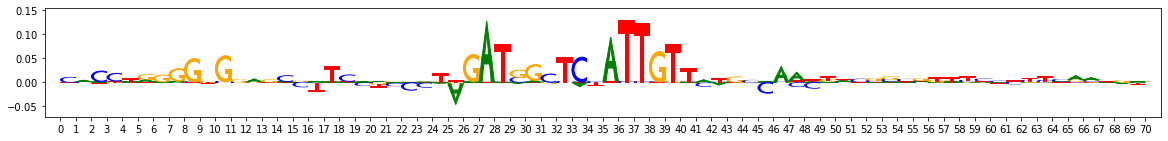

onehot, fwd and rev:


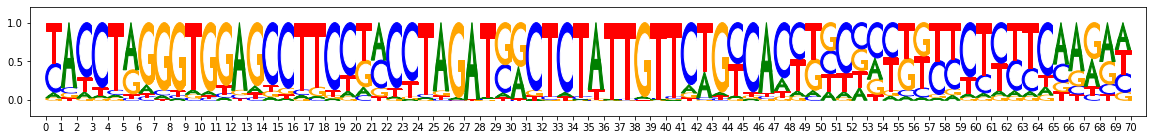

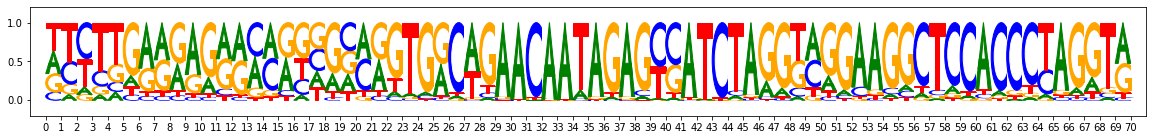

metacluster_0 pattern_7
total seqlets: 491
Task 0 hypothetical scores:


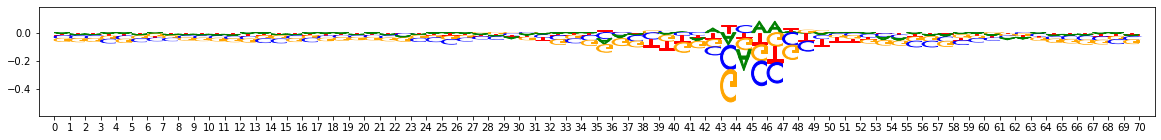

Task 0 actual importance scores:


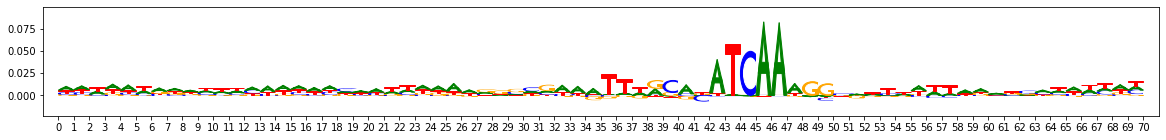

onehot, fwd and rev:


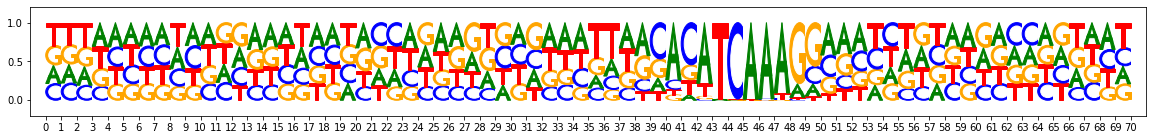

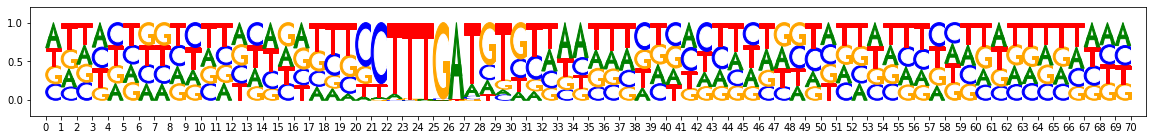

metacluster_0 pattern_8
total seqlets: 316
Task 0 hypothetical scores:


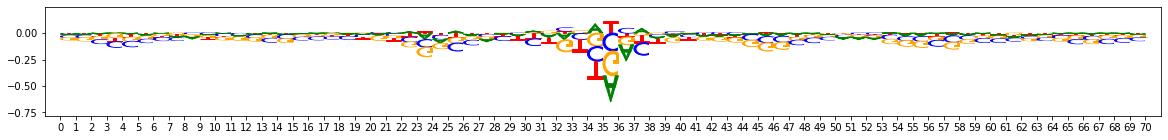

Task 0 actual importance scores:


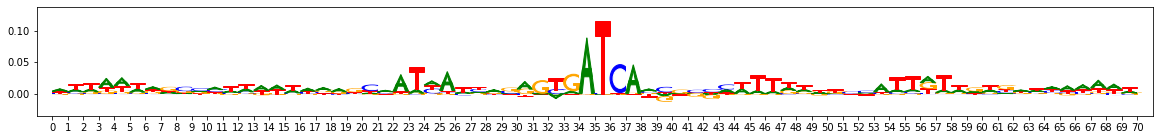

onehot, fwd and rev:


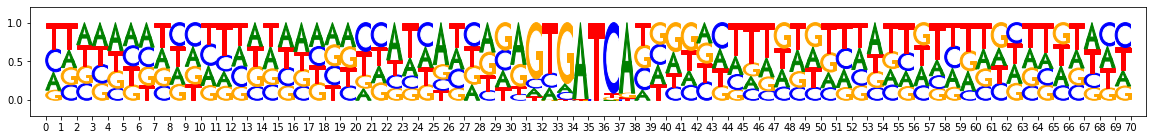

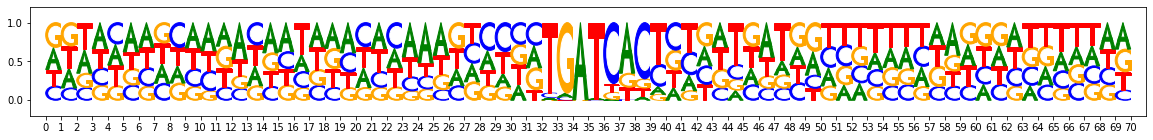

metacluster_0 pattern_9
total seqlets: 201
Task 0 hypothetical scores:


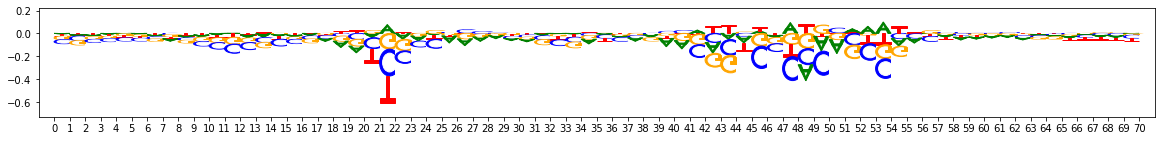

Task 0 actual importance scores:


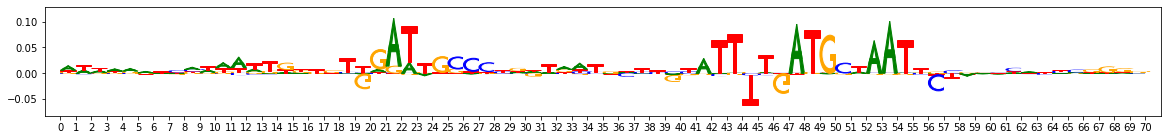

onehot, fwd and rev:


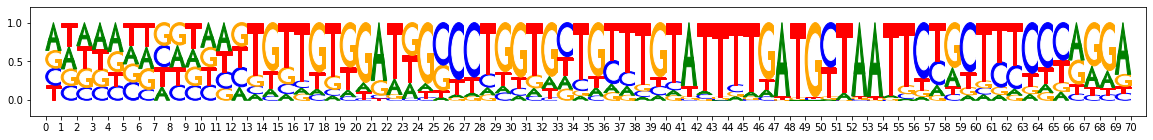

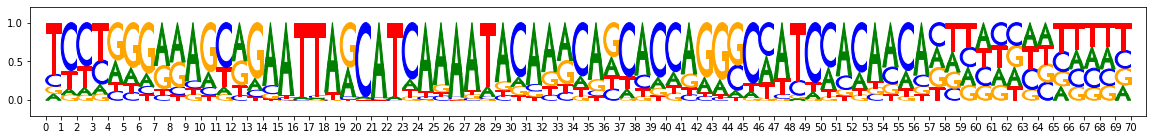

metacluster_0 pattern_10
total seqlets: 266
Task 0 hypothetical scores:


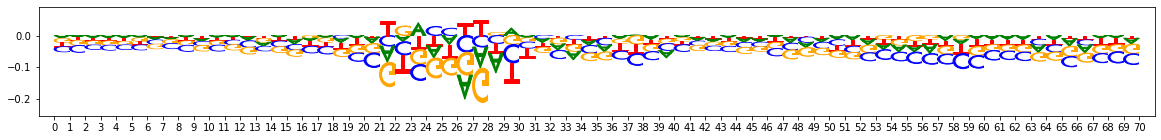

Task 0 actual importance scores:


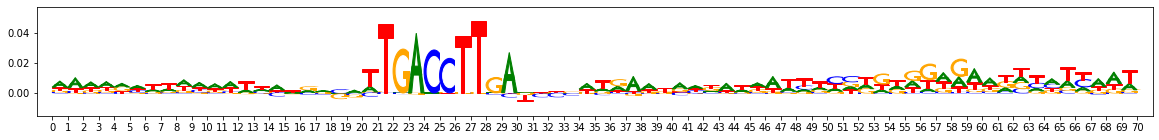

onehot, fwd and rev:


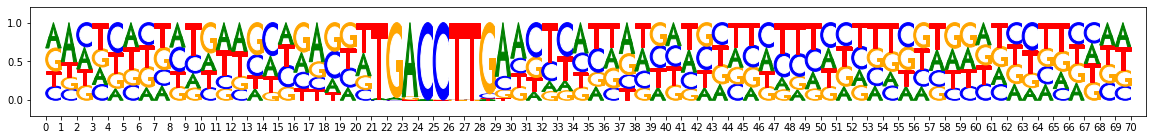

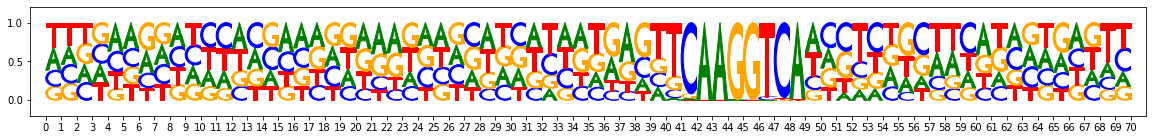

metacluster_0 pattern_11
total seqlets: 195
Task 0 hypothetical scores:


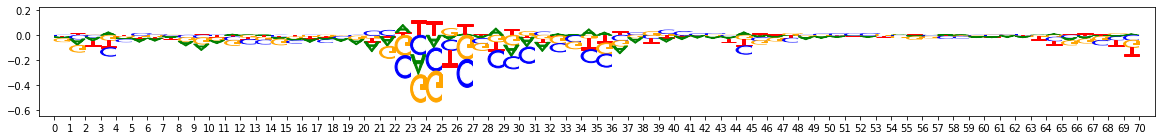

Task 0 actual importance scores:


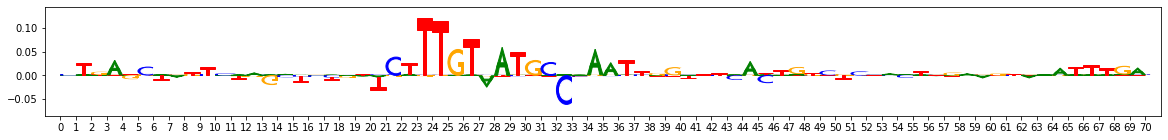

onehot, fwd and rev:


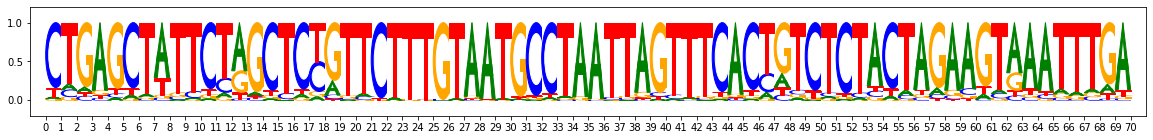

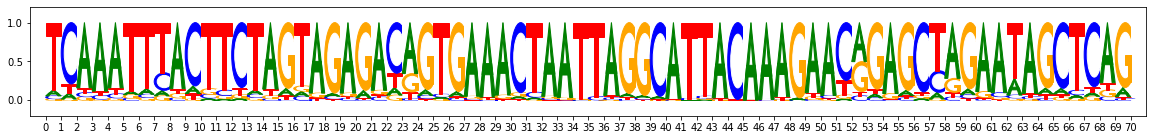

metacluster_0 pattern_12
total seqlets: 164
Task 0 hypothetical scores:


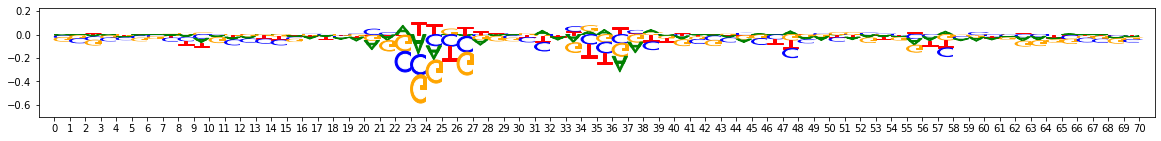

Task 0 actual importance scores:


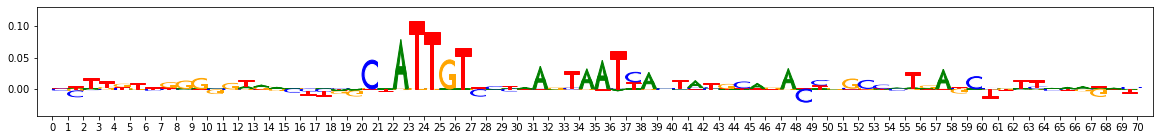

onehot, fwd and rev:


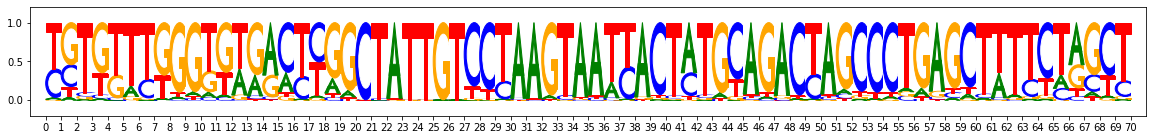

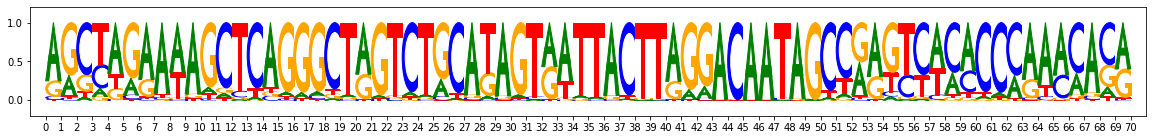

metacluster_0 pattern_13
total seqlets: 165
Task 0 hypothetical scores:


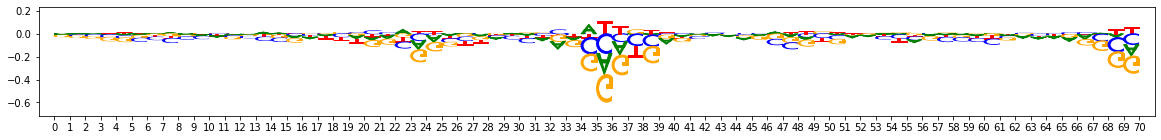

Task 0 actual importance scores:


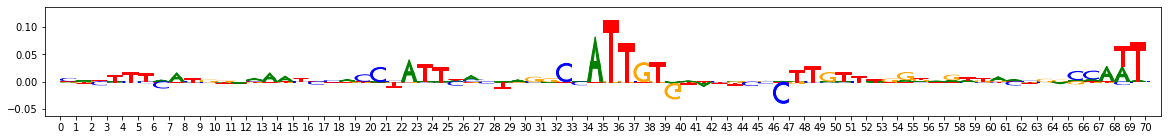

onehot, fwd and rev:


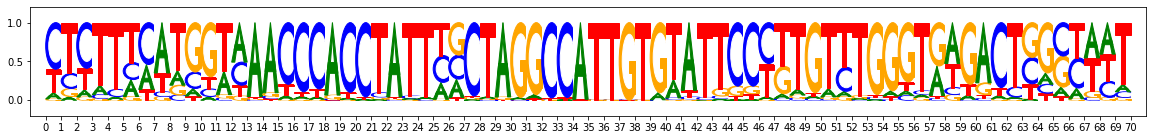

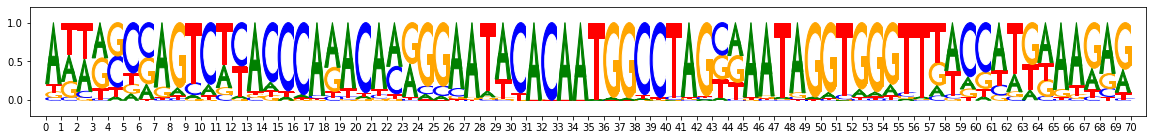

metacluster_0 pattern_14
total seqlets: 129
Task 0 hypothetical scores:


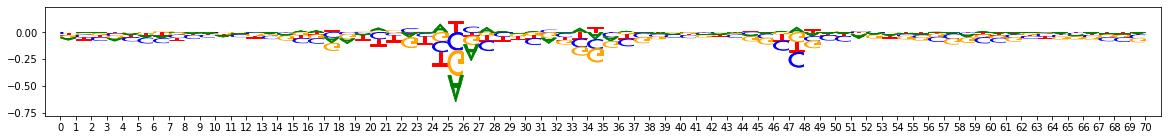

Task 0 actual importance scores:


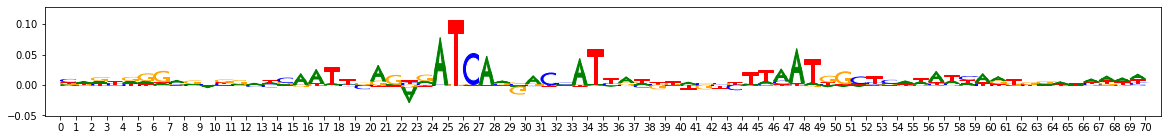

onehot, fwd and rev:


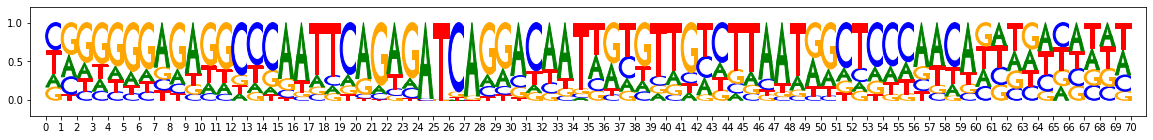

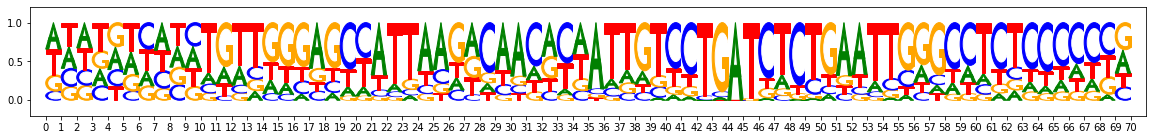

metacluster_0 pattern_15
total seqlets: 98
Task 0 hypothetical scores:


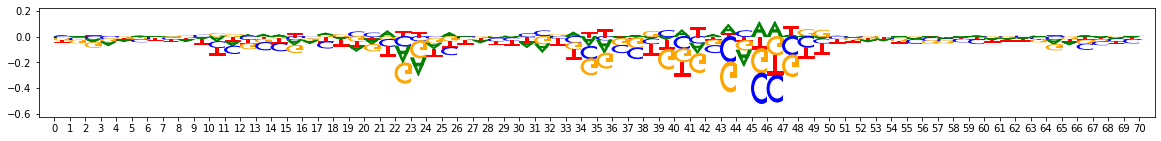

Task 0 actual importance scores:


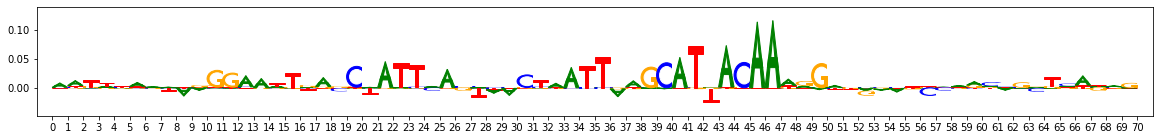

onehot, fwd and rev:


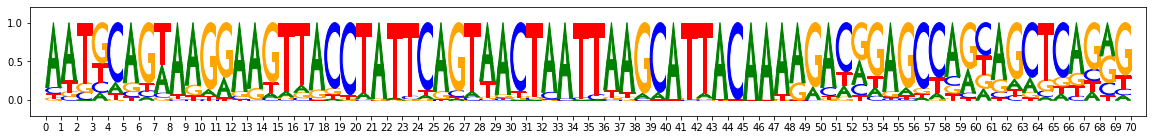

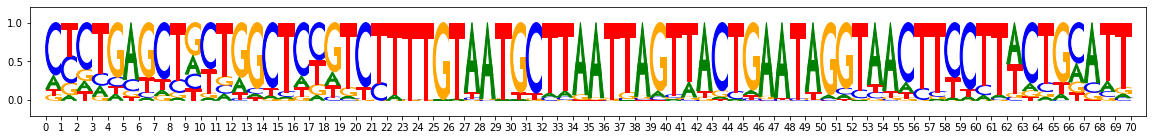

metacluster_0 pattern_16
total seqlets: 87
Task 0 hypothetical scores:


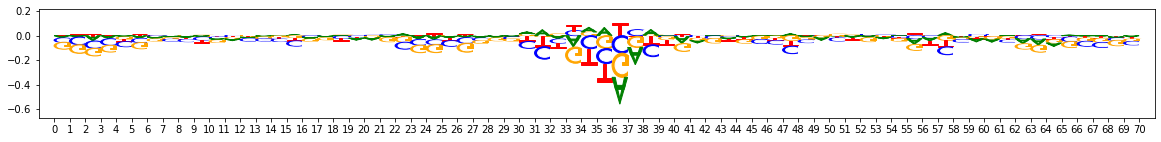

Task 0 actual importance scores:


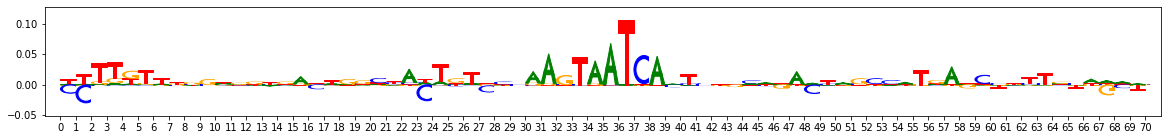

onehot, fwd and rev:


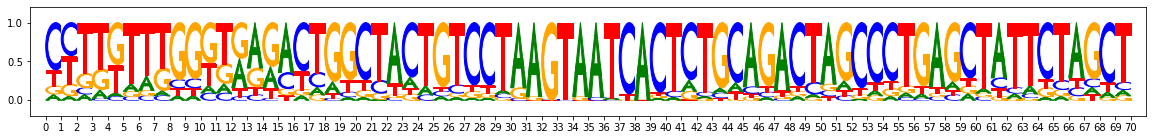

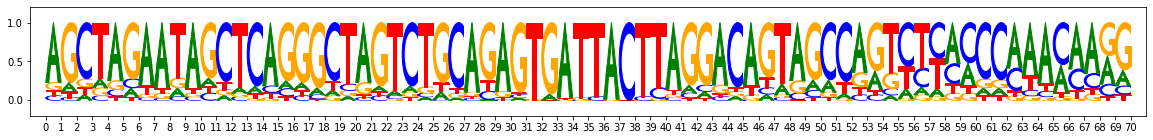

metacluster_0 pattern_17
total seqlets: 95
Task 0 hypothetical scores:


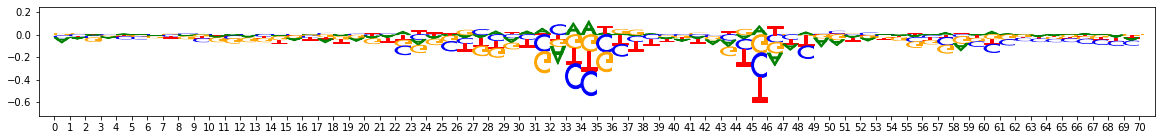

Task 0 actual importance scores:


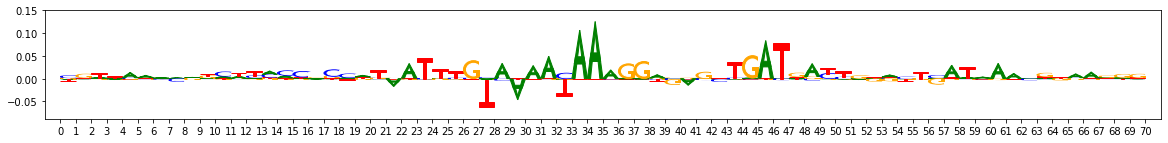

onehot, fwd and rev:


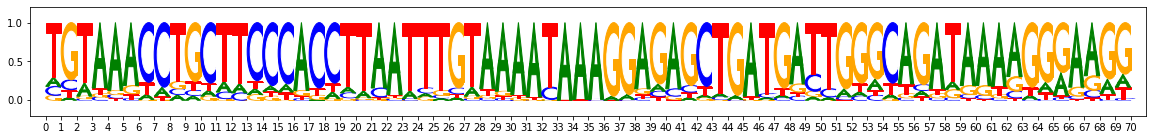

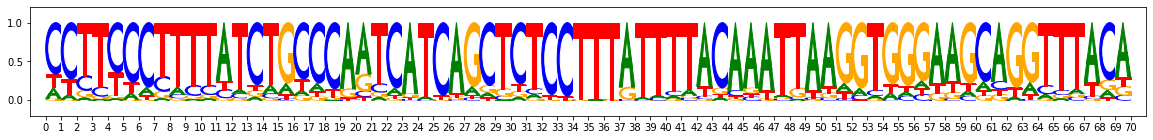

metacluster_0 pattern_18
total seqlets: 68
Task 0 hypothetical scores:


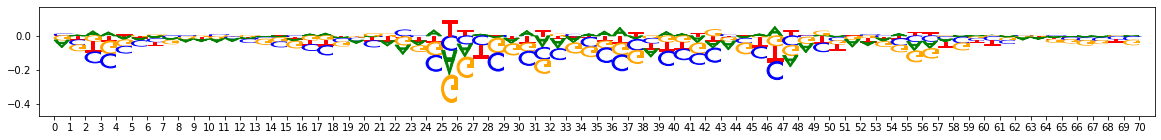

Task 0 actual importance scores:


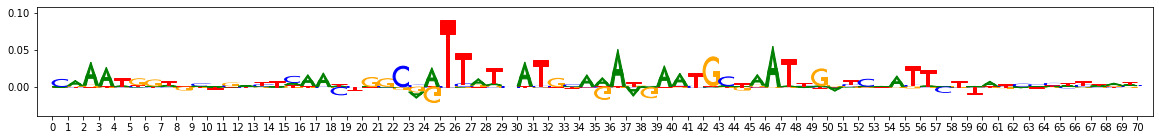

onehot, fwd and rev:


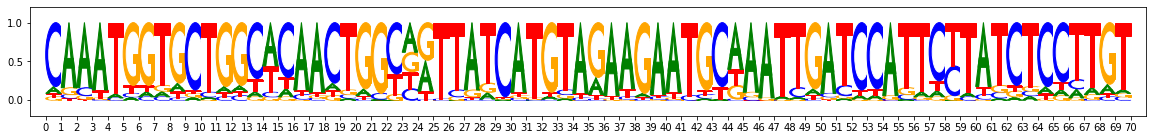

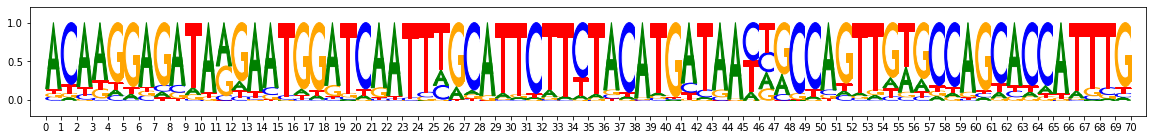

metacluster_0 pattern_19
total seqlets: 65
Task 0 hypothetical scores:


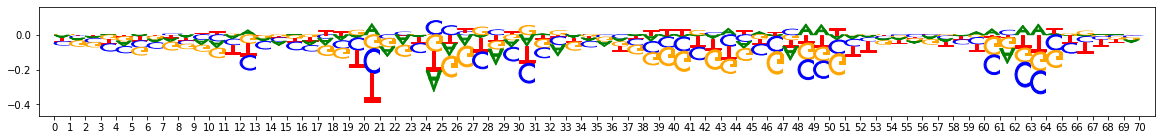

Task 0 actual importance scores:


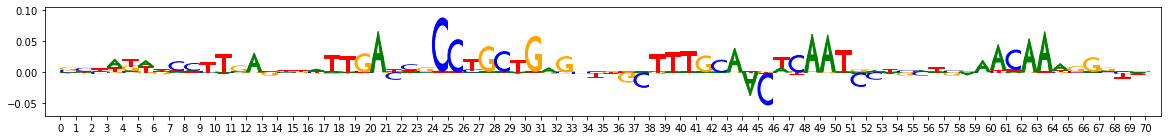

onehot, fwd and rev:


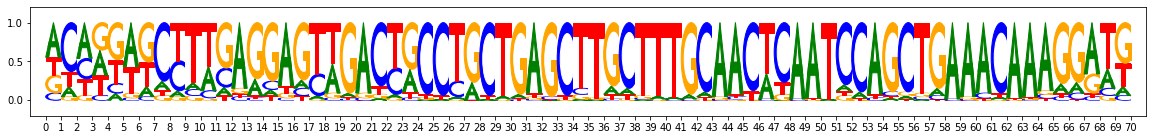

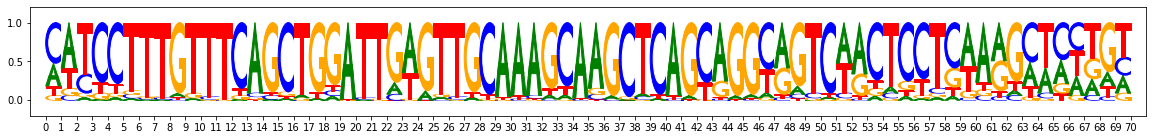

In [11]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()

In [ ]:
from modisco.visualization import viz_sequence
meme_discovered_motifs = (results
    .metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result
    .each_round_initcluster_motifs[0])
for idx,motif in enumerate(meme_discovered_motifs):
    print("MEME-DISco motif number",idx)
    print("num seqlets:",len(motif.seqlets))
    viz_sequence.plot_weights(motif["Nanog_profile_wn_hypothetical_contribs"].fwd)
    viz_sequence.plot_weights(motif["sequence"].fwd)

In [ ]:
from modisco.visualization import viz_sequence
meme_discovered_motifs = (results
    .metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result
    .each_round_initcluster_motifs[1])
for idx,motif in enumerate(meme_discovered_motifs):
    print("MEME-DISco motif number",idx)
    print("num seqlets:",len(motif.seqlets))
    viz_sequence.plot_weights(motif["Nanog_profile_wn_hypothetical_contribs"].fwd)
    viz_sequence.plot_weights(motif["sequence"].fwd)